In [1]:
%matplotlib inline

In [2]:
from nb_import import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tools

In [6]:
from pyforce import pyforce

In [7]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# MNIST-2k

In [8]:
(X_train, y_train, X_test, y_test) = tools.get_dataset('mnist-2k')

In [9]:
pdist = pyforce.Distances(X_train)

In [10]:
pca = PCA(n_components=2).fit_transform(X_train)
pca = preprocessing.scale(pca)

In [11]:
fe_pca = pyforce.ForceEmbedding(pca.copy(), pdist)

In [12]:
%time fe_pca.optimize(n_iter=100)

CPU times: user 1min 29s, sys: 2.83 s, total: 1min 32s
Wall time: 24.4 s


ForceEmbedding([[ -1.90509516,  28.43665463],
                [ 18.74753821, -27.99213339],
                [ 24.33695185, -19.01942612],
                ...,
                [ 18.18578589,  -6.86080463],
                [ -2.17432346,  22.0356397 ],
                [ -1.51093193,  13.56105281]])

In [13]:
fe_pca_sgd = pyforce.ForceEmbedding(pca.copy(), pdist)

In [14]:
%time fe_pca_sgd.optimize(n_iter=100, method='sgd')

CPU times: user 1min 29s, sys: 2.86 s, total: 1min 32s
Wall time: 24.5 s


ForceEmbedding([[ -2.13806239,  29.60849731],
                [ 15.96401035, -31.43767151],
                [ 25.55512527, -19.8898843 ],
                ...,
                [ 19.31722446,  -4.98926167],
                [ -3.52929746,  21.76765868],
                [  2.6167643 ,  14.0111305 ]])

## plots

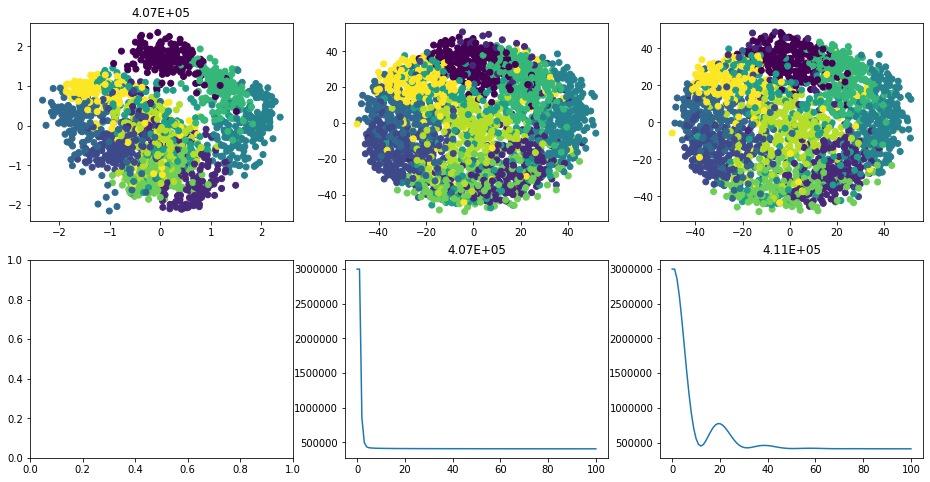

In [15]:
fig, ax = plt.subplots(2,3, figsize=(16,8))

ax[0,0].scatter(pca[:,0], pca[:,1], c=y_train)
_=ax[0,0].set_title("{:.2E}".format(fe_pca.stress()))

ax[0,1].scatter(fe_pca[:,0], fe_pca[:,1], c=y_train)
ax[1,1].plot(np.array(fe_pca.error))
_=ax[1,1].set_title("{:.2E}".format(fe_pca.stress()))

ax[0,2].scatter(fe_pca_sgd[:,0], fe_pca_sgd[:,1], c=y_train)
ax[1,2].plot(np.array(fe_pca_sgd.error))
_=ax[1,2].set_title("{:.2E}".format(fe_pca_sgd.stress()))

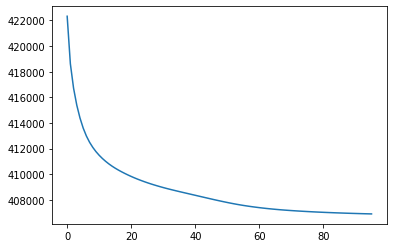

In [20]:
plt.plot(fe_pca.error[5:])

In [40]:
fe_pca_1k = pyforce.ForceEmbedding(pca.copy(), pdist)

In [41]:
%time fe_pca_1k.optimize(n_iter=1000)

CPU times: user 13min 12s, sys: 1min 28s, total: 14min 40s
Wall time: 3min 40s


ForceEmbedding([[ -1.38643358,  28.42393893],
                [ 19.01256576, -27.06881349],
                [ 25.2832434 , -17.59459255],
                ...,
                [ 17.92249205,  -7.79757608],
                [ -2.53582784,  22.82835082],
                [ -1.84321066,  12.16880386]])

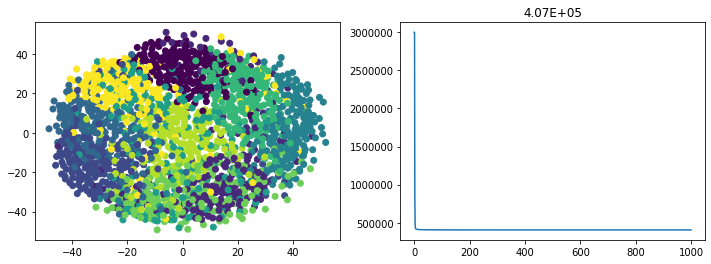

In [44]:
 fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].scatter(fe_pca_1k[:,0], fe_pca_1k[:,1], c=y_train)
ax[1].plot(np.array(fe_pca_1k.error))
_=ax[1].set_title("{:.2E}".format(fe_pca_1k.stress()))


# MNIST-70K root N

In [45]:
(X_train, y_train, X_test, y_test) = tools.get_dataset('mnist-70k')

## sample root N

In [46]:
N = X_train.shape[0]
rootN = np.int(np.sqrt(N))
rootN_ids = np.random.choice(N, size=rootN, replace=False)
rootN_data = X_train[rootN_ids]

In [48]:
pca = PCA(n_components=2).fit_transform(rootN_data)
pca = preprocessing.scale(pca)

In [49]:
pdist = pyforce.Distances(rootN_data)

In [50]:
fe_rootN = pyforce.ForceEmbedding(pca.copy(), pdist)

In [54]:
%time _=fe_rootN.optimize(n_iter=100, method='sgd')

CPU times: user 1.63 s, sys: 59.7 ms, total: 1.69 s
Wall time: 427 ms


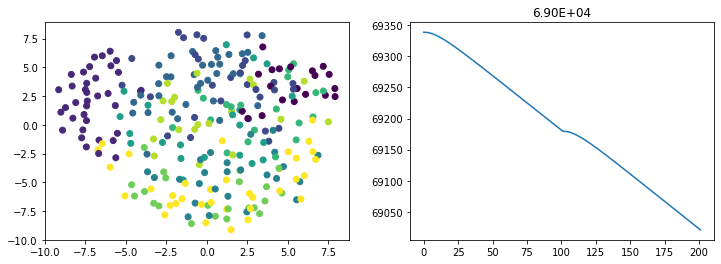

In [55]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].scatter(fe_rootN[:,0], fe_rootN[:,1], c=y_train[rootN_ids])
ax[1].plot(np.array(fe_rootN.error))
_=ax[1].set_title("{:.2E}".format(fe_rootN.stress()))
